In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

import statsmodels
import statsmodels.api as sm

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
train_outpatientdata=pd.read_csv('Train_Outpatientdata.csv')
test_outpatientdata=pd.read_csv('Test_Outpatientdata.csv')
train_inpatientdata=pd.read_csv('Train_Inpatientdata.csv')
test_inpatientdata=pd.read_csv('Test_Inpatientdata.csv')
train_beneficiarydata=pd.read_csv('Train_Beneficiarydata.csv')
test_beneficiarydata=pd.read_csv('Test_Beneficiarydata.csv')

In [4]:
pd.set_option('display.max_columns',1000)   #to view all columns in a dataset in jupyternotebook

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB


In [6]:
train_outpatientdata.shape

(517737, 27)

In [7]:
train_outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [8]:
test_outpatientdata.shape

(125841, 27)

In [9]:
test_outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [10]:
train_inpatientdata.shape

(40474, 30)

In [11]:
train_inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [12]:
test_inpatientdata.shape

(9551, 30)

In [13]:
train_beneficiarydata.shape

(138556, 25)

In [14]:
test_beneficiarydata.shape

(63968, 25)

In [15]:
train.shape

(5410, 2)

In [16]:
test.shape

(1353, 1)

# Finding Datatypes

In [17]:
train.dtypes

Provider          object
PotentialFraud    object
dtype: object

                                 The train Dataset has 2 variables . Both are Categorical

In [18]:
train_beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

                    Train Beneficiary Dataset has 25 variables, out of which 4 are categorical and 21 are numerical

In [19]:
train_inpatientdata.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

                 Train Inpatient dataset has 30 variables out of which 22 are categorical and 8 are numerical

In [20]:
train_outpatientdata.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

                Train Outpatient dataset has 27 variables out of which 19 are categorical and 8 are numerical

In [21]:
test.dtypes

Provider    object
dtype: object

In [22]:
test_beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [23]:
test_inpatientdata.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [24]:
test_outpatientdata.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

# Outlier Treatment and Handling missing values for "Train" Dataset

In [25]:
Number_of_missingvalues=train.isnull().sum()
total_entries=train.isnull().count()
Percent=(Number_of_missingvalues/total_entries)*100
missing_data=pd.concat([Number_of_missingvalues,Percent],axis=1,keys=['Number of Missing Values','Percentage of Missing Values'])
missing_data

,Number of Missing Values,Percentage of Missing Values
Provider,0,0.0
PotentialFraud,0,0.0


                        No columns are dropped in train dataset as it doesn't have more than 80% missing values

# Outlier Treatment and Handling missing values for "train_beneficiarydata" Dataset

In [26]:
Number_of_missingvalues=train_beneficiarydata.isnull().sum().sort_values(ascending=False)
Number_of_missingvalues

DOD                                137135
BeneID                                  0
ChronicCond_Cancer                      0
OPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
IPAnnualReimbursementAmt                0
ChronicCond_stroke                      0
ChronicCond_rheumatoidarthritis         0
ChronicCond_Osteoporasis                0
ChronicCond_IschemicHeart               0
ChronicCond_Diabetes                    0
ChronicCond_Depression                  0
ChronicCond_ObstrPulmonary              0
ChronicCond_KidneyDisease               0
DOB                                     0
ChronicCond_Heartfailure                0
ChronicCond_Alzheimer                   0
NoOfMonths_PartBCov                     0
NoOfMonths_PartACov                     0
County                                  0
State                                   0
RenalDiseaseIndicator                   0
Race                                    0
Gender                            

In [27]:
total_entries=train_beneficiarydata.isnull().count().sort_values(ascending=False)
total_entries

BeneID                             138556
ChronicCond_Cancer                 138556
OPAnnualReimbursementAmt           138556
IPAnnualDeductibleAmt              138556
IPAnnualReimbursementAmt           138556
ChronicCond_stroke                 138556
ChronicCond_rheumatoidarthritis    138556
ChronicCond_Osteoporasis           138556
ChronicCond_IschemicHeart          138556
ChronicCond_Diabetes               138556
ChronicCond_Depression             138556
ChronicCond_ObstrPulmonary         138556
ChronicCond_KidneyDisease          138556
DOB                                138556
ChronicCond_Heartfailure           138556
ChronicCond_Alzheimer              138556
NoOfMonths_PartBCov                138556
NoOfMonths_PartACov                138556
County                             138556
State                              138556
RenalDiseaseIndicator              138556
Race                               138556
Gender                             138556
DOD                               

In [28]:
Percent=(Number_of_missingvalues/total_entries)*100
missing_data=pd.concat([Number_of_missingvalues,Percent],axis=1,keys=['Number of Missing Values','Percentage of Missing Values'])
missing_data

,Number of Missing Values,Percentage of Missing Values
DOD,137135,98.974422
BeneID,0,0.000000
ChronicCond_Cancer,0,0.000000
OPAnnualReimbursementAmt,0,0.000000
IPAnnualDeductibleAmt,0,0.000000
IPAnnualReimbursementAmt,0,0.000000
ChronicCond_stroke,0,0.000000
ChronicCond_rheumatoidarthritis,0,0.000000
ChronicCond_Osteoporasis,0,0.000000
ChronicCond_IschemicHeart,0,0.000000


                    Dropping 1 column DOD in train_beneficiary dataset as it has more than 80% missing values

In [29]:
train_beneficiarydata.drop(['DOD'],axis=1,inplace=True)

In [30]:
train_beneficiarydata.columns

Index(['BeneID', 'DOB', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

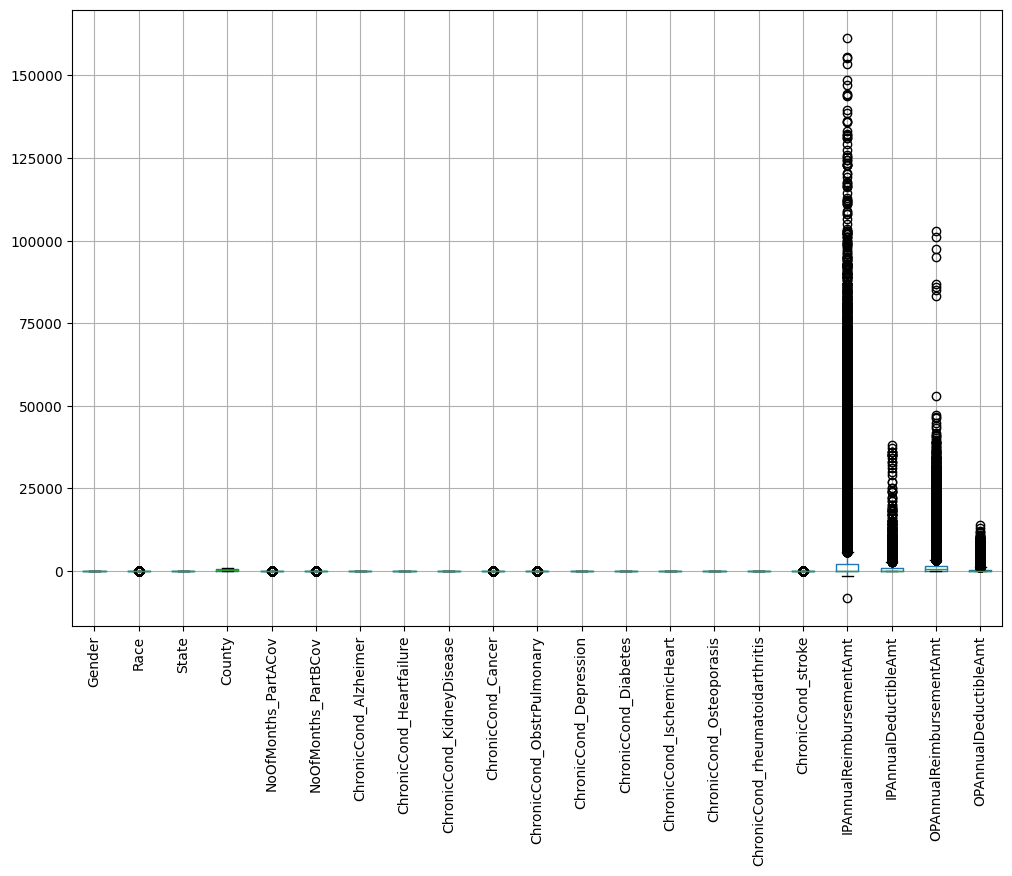

In [31]:
plt.figure(figsize=(12,8))
train_beneficiarydata.boxplot()
plt.xticks(rotation=90)
plt.show()

                            In train Benefeciary DataFrame there are 4 variables with outliers

In [32]:
# finding outliers data points using UL(Upper limit), LL(Lower limit) and IQR(Inter quartile range)
def outlier_treatment(col):
  q1=np.quantile(col,0.25)
  q3=np.quantile(col,0.75)
  IQR=q3-q1
  UL=q3+1.5*IQR
  LL=q1-1.5*IQR
  return UL,LL

In [33]:
# replacing outlier datapoints with missing value
for i in train_beneficiarydata.columns:
  if train_beneficiarydata[i].dtype!='object':
    UL,LL=outlier_treatment(train_beneficiarydata[i])
    train_beneficiarydata[i]=np.where((train_beneficiarydata[i]>UL) | (train_beneficiarydata[i]<LL),np.nan,train_beneficiarydata[i])

In [34]:
train_beneficiarydata.isnull().sum()

BeneID                                 0
DOB                                    0
Gender                                 0
Race                               21499
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                 1167
NoOfMonths_PartBCov                 1654
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                 16621
ChronicCond_ObstrPulmonary         32859
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                 10954
IPAnnualReimbursementAmt           26044
IPAnnualDeductibleAmt               2717
OPAnnualReimbursementAmt           11612
OPAnnualDeductibleAmt              12020
dtype: int64

In [35]:
mice=IterativeImputer(random_state=102)
train_beneficiarydata_mice=train_beneficiarydata.copy()

In [36]:
train_beneficiarydata_mice.loc[:,'IPAnnualReimbursementAmt':'OPAnnualDeductibleAmt']=mice.fit_transform(train_beneficiarydata_mice.loc[:,'IPAnnualReimbursementAmt':'OPAnnualDeductibleAmt'])

In [37]:
train_beneficiarydata_mice.loc[:,['Race','NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_stroke']]=mice.fit_transform(train_beneficiarydata_mice.loc[:,['Race','NoOfMonths_PartACov','NoOfMonths_PartBCov','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_stroke']])
train_beneficiarydata_mice.isnull().sum()

BeneID                             0
DOB                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
dtype: int64

# Outliers Treatment and Handling Missing Values for 'train_inpatientdata' Dataset

In [38]:
Number_of_missingvalues=train_inpatientdata.isnull().sum().sort_values(ascending=False)
total_entries=train_inpatientdata.isnull().count().sort_values(ascending=False)
Percent=(Number_of_missingvalues/total_entries)*100
missing_data=pd.concat([Number_of_missingvalues,Percent],axis=1,keys=['Number of Missing Values','Percentage of Missing Values'])
missing_data

,Number of Missing Values,Percentage of Missing Values
ClmProcedureCode_6,40474,100.000000
ClmProcedureCode_5,40465,99.977764
ClmProcedureCode_4,40358,99.713396
ClmProcedureCode_3,39509,97.615753
ClmDiagnosisCode_10,36547,90.297475
OtherPhysician,35784,88.412314
ClmProcedureCode_2,35020,86.524683
ClmProcedureCode_1,17326,42.807728
OperatingPhysician,16644,41.122696
ClmDiagnosisCode_9,13497,33.347334


            As 7 variables in train_inpatient dataset has missing values greater than 80% , it is dropped

In [39]:
train_inpatientdata.drop(['ClmProcedureCode_2','OtherPhysician','ClmDiagnosisCode_10','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6'],axis=1,inplace=True)

In [40]:
train_inpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmProcedureCode_1'],
      dtype='object')

In [41]:
train_inpatientdata.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmProcedureCode_1        17326
dtype: int64

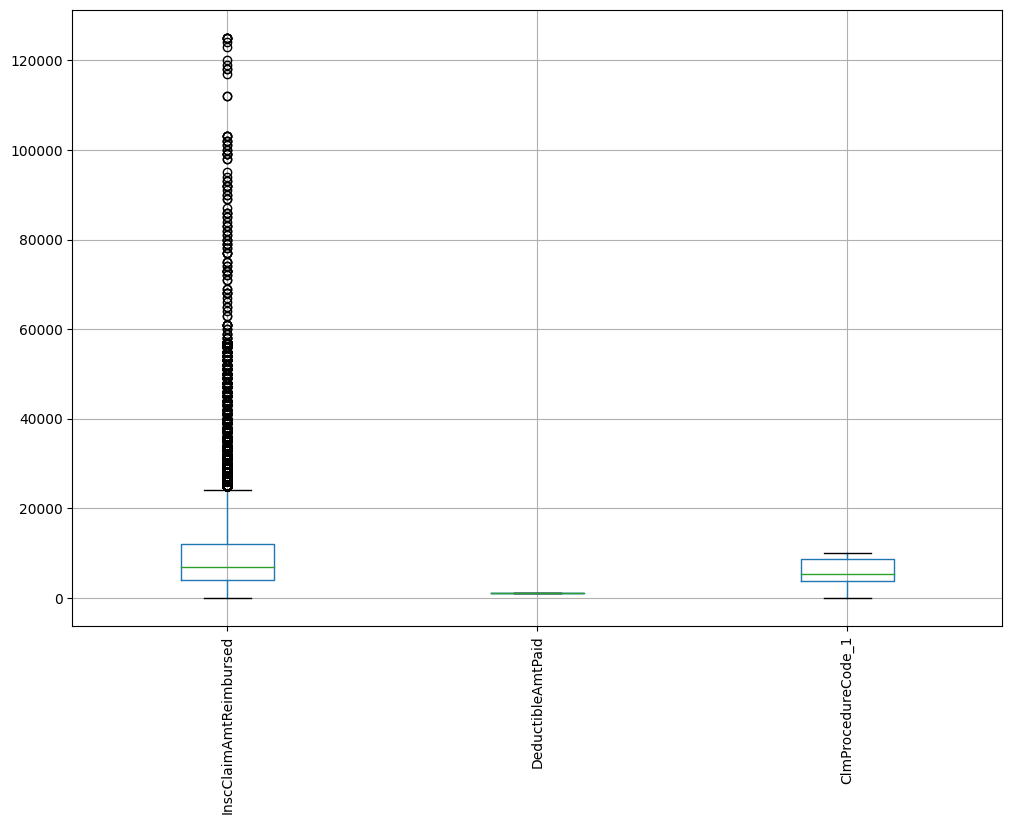

In [42]:
plt.figure(figsize=(12,8))
train_inpatientdata.boxplot()
plt.xticks(rotation=90)
plt.show()

                        3 Variables in train_inpatientdata Dataset has outlier datapoints. 

In [43]:
mice=IterativeImputer(random_state=102)
train_inpatientdata_mice=train_inpatientdata.copy()

In [44]:
train_inpatientdata_mice.loc[:,['DeductibleAmtPaid','ClmProcedureCode_1']]=mice.fit_transform(train_inpatientdata_mice.loc[:,['DeductibleAmtPaid','ClmProcedureCode_1']])

In [45]:
AP=train_inpatientdata_mice['AttendingPhysician'].value_counts().sort_values(ascending=False).head(1)
OP=train_inpatientdata_mice['OperatingPhysician'].value_counts().head(1)
CDC_2=train_inpatientdata_mice['ClmDiagnosisCode_2'].value_counts().head(1)
CDC_3=train_inpatientdata_mice['ClmDiagnosisCode_3'].value_counts().head(1)
CDC_4=train_inpatientdata_mice['ClmDiagnosisCode_4'].value_counts().head(1)
CDC_5=train_inpatientdata_mice['ClmDiagnosisCode_5'].value_counts().head(1)
CDC_6=train_inpatientdata_mice['ClmDiagnosisCode_6'].value_counts().head(1)
CDC_7=train_inpatientdata_mice['ClmDiagnosisCode_7'].value_counts().head(1)
CDC_8=train_inpatientdata_mice['ClmDiagnosisCode_8'].value_counts().head(1)
CDC_9=train_inpatientdata_mice['ClmDiagnosisCode_9'].value_counts().head(1)

In [46]:
train_inpatientdata_mice['AttendingPhysician']=train_inpatientdata_mice['AttendingPhysician'].replace(np.nan,'PHY422134')
train_inpatientdata_mice['OperatingPhysician']=train_inpatientdata_mice['OperatingPhysician'].replace(np.nan,'PHY429430')
train_inpatientdata_mice['ClmDiagnosisCode_2']=train_inpatientdata_mice['ClmDiagnosisCode_2'].replace(np.nan,'4019')
train_inpatientdata_mice['ClmDiagnosisCode_3']=train_inpatientdata_mice['ClmDiagnosisCode_3'].replace(np.nan,'4019')
train_inpatientdata_mice['ClmDiagnosisCode_4']=train_inpatientdata_mice['ClmDiagnosisCode_4'].replace(np.nan,'4019')
train_inpatientdata_mice['ClmDiagnosisCode_5']=train_inpatientdata_mice['ClmDiagnosisCode_5'].replace(np.nan,'4019')
train_inpatientdata_mice['ClmDiagnosisCode_6']=train_inpatientdata_mice['ClmDiagnosisCode_6'].replace(np.nan,'4019')
train_inpatientdata_mice['ClmDiagnosisCode_7']=train_inpatientdata_mice['ClmDiagnosisCode_7'].replace(np.nan,'4019')
train_inpatientdata_mice['ClmDiagnosisCode_8']=train_inpatientdata_mice['ClmDiagnosisCode_8'].replace(np.nan,'4019')
train_inpatientdata_mice['ClmDiagnosisCode_9']=train_inpatientdata_mice['ClmDiagnosisCode_9'].replace(np.nan,'4019')

In [47]:
train_inpatientdata_mice.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OperatingPhysician        0
AdmissionDt               0
ClmAdmitDiagnosisCode     0
DeductibleAmtPaid         0
DischargeDt               0
DiagnosisGroupCode        0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
ClmDiagnosisCode_5        0
ClmDiagnosisCode_6        0
ClmDiagnosisCode_7        0
ClmDiagnosisCode_8        0
ClmDiagnosisCode_9        0
ClmProcedureCode_1        0
dtype: int64

# Outlier Treatment and Handling Missing Values in "train_outpatientdata" Dataset

In [48]:
Number_of_missingvalues=train_outpatientdata.isnull().sum().sort_values(ascending=False)
total_entries=train_outpatientdata.isnull().count().sort_values(ascending=False)
Percent=(Number_of_missingvalues/total_entries)*100
missing_data=pd.concat([Number_of_missingvalues,Percent],axis=1,keys=['Number of Missing Values','Percentage of Missing Values'])
missing_data

,Number of Missing Values,Percentage of Missing Values
ClmProcedureCode_6,517737,100.000000
ClmProcedureCode_5,517737,100.000000
ClmProcedureCode_4,517735,99.999614
ClmProcedureCode_3,517733,99.999227
ClmProcedureCode_2,517701,99.993047
ClmProcedureCode_1,517575,99.968710
ClmDiagnosisCode_10,516654,99.790820
ClmDiagnosisCode_9,502899,97.134066
ClmDiagnosisCode_8,494825,95.574587
ClmDiagnosisCode_7,484776,93.633640


                 As 7 variables in train_outpatient dataset has missing values greater than 80% , it is dropped

In [49]:
train_outpatientdata.drop(['ClmProcedureCode_6','ClmProcedureCode_5','ClmProcedureCode_4','ClmProcedureCode_3','ClmProcedureCode_2','ClmProcedureCode_1','ClmDiagnosisCode_10','ClmDiagnosisCode_9','ClmDiagnosisCode_8','ClmDiagnosisCode_7','ClmDiagnosisCode_6','ClmDiagnosisCode_5','OperatingPhysician'],axis=1,inplace=True)

In [50]:
train_outpatientdata.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode'],
      dtype='object')

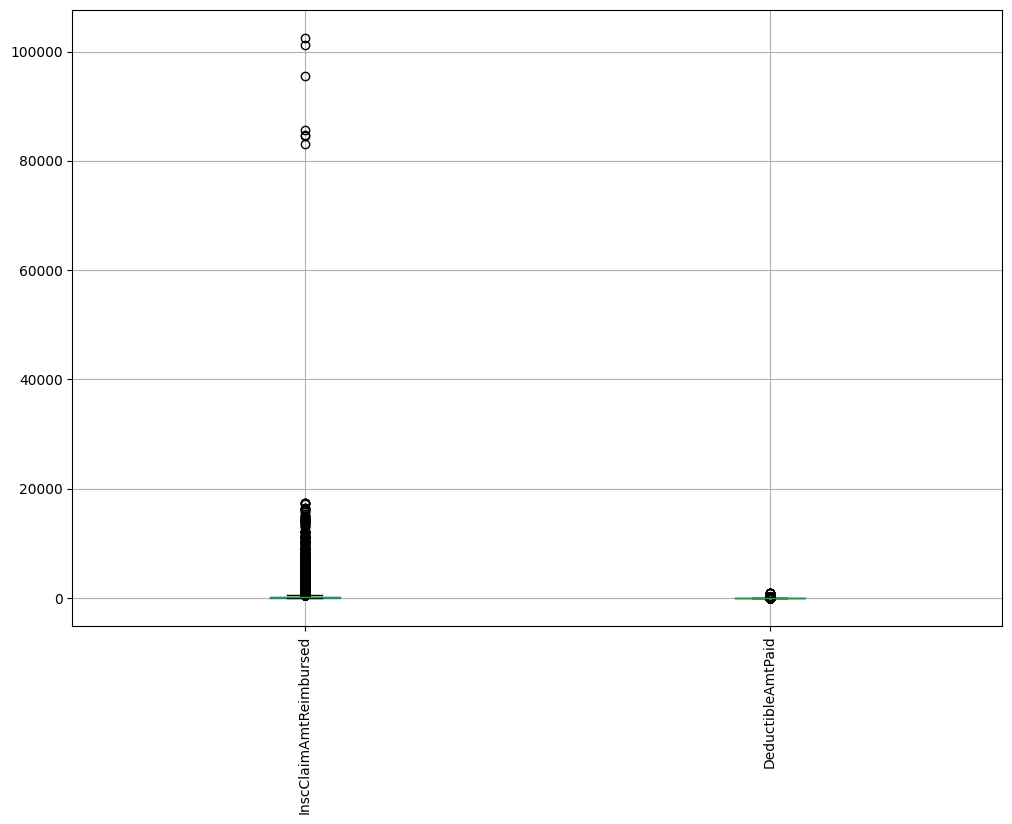

In [51]:
plt.figure(figsize=(12,8))
train_outpatientdata.boxplot()
plt.xticks(rotation=90)
plt.show()

In [52]:
mice=IterativeImputer(random_state=102)
train_outpatientdata_mice=train_outpatientdata.copy()

In [53]:
train_outpatientdata_mice['AttendingPhysician'].value_counts().head(3)

AttendingPhysician
PHY330576    2534
PHY350277    1628
PHY412132    1321
Name: count, dtype: int64

In [54]:
train_outpatientdata_mice['OtherPhysician'].value_counts().head(3)

OtherPhysician
PHY412132    1247
PHY341578    1098
PHY338032    1070
Name: count, dtype: int64

In [55]:
train_outpatientdata_mice['ClmDiagnosisCode_1'].value_counts().head(3)

ClmDiagnosisCode_1
4019    13803
4011    12512
2724     3603
Name: count, dtype: int64

In [56]:
train_outpatientdata_mice['ClmDiagnosisCode_2'].value_counts().head(3)

ClmDiagnosisCode_2
4019     19894
25000    10674
2724     10147
Name: count, dtype: int64

In [57]:
train_outpatientdata_mice['ClmDiagnosisCode_3'].value_counts().head(3)

ClmDiagnosisCode_3
4019     12126
25000     6838
2724      6271
Name: count, dtype: int64

In [58]:
train_outpatientdata_mice['ClmDiagnosisCode_4'].value_counts().head(3)

ClmDiagnosisCode_4
4019     7088
25000    4235
2724     3736
Name: count, dtype: int64

In [59]:
train_outpatientdata_mice['ClmAdmitDiagnosisCode'].value_counts().head(3)

ClmAdmitDiagnosisCode
V7612    4074
42731    3001
4019     2627
Name: count, dtype: int64

In [60]:
train_outpatientdata_mice['AttendingPhysician']=train_outpatientdata_mice['AttendingPhysician'].replace(np.nan,'PHY422134')
train_outpatientdata_mice['OtherPhysician']=train_outpatientdata_mice['OtherPhysician'].replace(np.nan,'PHY429430')
train_outpatientdata_mice['ClmDiagnosisCode_1']=train_outpatientdata_mice['ClmDiagnosisCode_1'].replace(np.nan,'4019')
train_outpatientdata_mice['ClmDiagnosisCode_2']=train_outpatientdata_mice['ClmDiagnosisCode_2'].replace(np.nan,'4019')
train_outpatientdata_mice['ClmDiagnosisCode_3']=train_outpatientdata_mice['ClmDiagnosisCode_3'].replace(np.nan,'4019')
train_outpatientdata_mice['ClmDiagnosisCode_4']=train_outpatientdata_mice['ClmDiagnosisCode_4'].replace(np.nan,'4019')
train_outpatientdata_mice['ClmAdmitDiagnosisCode']=train_outpatientdata_mice['ClmAdmitDiagnosisCode'].replace(np.nan,'V7612')

In [61]:
train_outpatientdata_mice.isnull().sum()

BeneID                    0
ClaimID                   0
ClaimStartDt              0
ClaimEndDt                0
Provider                  0
InscClaimAmtReimbursed    0
AttendingPhysician        0
OtherPhysician            0
ClmDiagnosisCode_1        0
ClmDiagnosisCode_2        0
ClmDiagnosisCode_3        0
ClmDiagnosisCode_4        0
DeductibleAmtPaid         0
ClmAdmitDiagnosisCode     0
dtype: int64

# Merging the datasets

In [62]:
Train_Outpatient_Merge = pd.merge(train_outpatientdata_mice, train,on ='Provider' ,how = 'inner')
Train_Outpatient_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   BeneID                  517737 non-null  object
 1   ClaimID                 517737 non-null  object
 2   ClaimStartDt            517737 non-null  object
 3   ClaimEndDt              517737 non-null  object
 4   Provider                517737 non-null  object
 5   InscClaimAmtReimbursed  517737 non-null  int64 
 6   AttendingPhysician      517737 non-null  object
 7   OtherPhysician          517737 non-null  object
 8   ClmDiagnosisCode_1      517737 non-null  object
 9   ClmDiagnosisCode_2      517737 non-null  object
 10  ClmDiagnosisCode_3      517737 non-null  object
 11  ClmDiagnosisCode_4      517737 non-null  object
 12  DeductibleAmtPaid       517737 non-null  int64 
 13  ClmAdmitDiagnosisCode   517737 non-null  object
 14  PotentialFraud          517737 non-n

In [63]:
Train_Inpatient_Merge = pd.merge(train_outpatientdata_mice, train,on ='Provider' ,how = 'inner')
Train_Inpatient_Merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   BeneID                  517737 non-null  object
 1   ClaimID                 517737 non-null  object
 2   ClaimStartDt            517737 non-null  object
 3   ClaimEndDt              517737 non-null  object
 4   Provider                517737 non-null  object
 5   InscClaimAmtReimbursed  517737 non-null  int64 
 6   AttendingPhysician      517737 non-null  object
 7   OtherPhysician          517737 non-null  object
 8   ClmDiagnosisCode_1      517737 non-null  object
 9   ClmDiagnosisCode_2      517737 non-null  object
 10  ClmDiagnosisCode_3      517737 non-null  object
 11  ClmDiagnosisCode_4      517737 non-null  object
 12  DeductibleAmtPaid       517737 non-null  int64 
 13  ClmAdmitDiagnosisCode   517737 non-null  object
 14  PotentialFraud          517737 non-n

In [64]:
Train_Inpatient_Outpatient_Merge = pd.merge(Train_Outpatient_Merge,Train_Inpatient_Merge,on ='ClaimID' ,how = 'inner')
Train_Inpatient_Outpatient_Merge.head()

,BeneID_x,ClaimID,ClaimStartDt_x,ClaimEndDt_x,Provider_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,DeductibleAmtPaid_x,ClmAdmitDiagnosisCode_x,PotentialFraud_x,BeneID_y,ClaimStartDt_y,ClaimEndDt_y,Provider_y,InscClaimAmtReimbursed_y,AttendingPhysician_y,OtherPhysician_y,ClmDiagnosisCode_1_y,ClmDiagnosisCode_2_y,ClmDiagnosisCode_3_y,ClmDiagnosisCode_4_y,DeductibleAmtPaid_y,ClmAdmitDiagnosisCode_y,PotentialFraud_y
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY429430,78943,V5866,V1272,4019,0,56409,Yes,BENE11002,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY429430,78943,V5866,V1272,4019,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,PHY429430,71988,4019,4019,4019,0,V7612,Yes,BENE11004,2009-01-06,2009-01-06,PRV56011,40,PHY334319,PHY429430,71988,4019,4019,4019,0,V7612,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,PHY429430,82382,30000,72887,4280,0,71947,Yes,BENE11004,2009-01-22,2009-01-22,PRV56011,200,PHY403831,PHY429430,82382,30000,72887,4280,0,71947,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,PHY429430,20381,4019,4019,4019,0,V7612,Yes,BENE11004,2009-02-03,2009-02-03,PRV56011,20,PHY339887,PHY429430,20381,4019,4019,4019,0,V7612,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,PHY429430,V6546,4280,2449,V854,0,V7612,Yes,BENE11004,2009-03-03,2009-03-03,PRV56011,40,PHY345721,PHY429430,V6546,4280,2449,V854,0,V7612,Yes


In [65]:
Train_Inpatient_Outpatient_Merge.rename({'BeneID_x':'BeneID'},inplace = True,axis =1)
Train_Inpatient_Outpatient_Merge.head(2)

,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,Provider_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,DeductibleAmtPaid_x,ClmAdmitDiagnosisCode_x,PotentialFraud_x,BeneID_y,ClaimStartDt_y,ClaimEndDt_y,Provider_y,InscClaimAmtReimbursed_y,AttendingPhysician_y,OtherPhysician_y,ClmDiagnosisCode_1_y,ClmDiagnosisCode_2_y,ClmDiagnosisCode_3_y,ClmDiagnosisCode_4_y,DeductibleAmtPaid_y,ClmAdmitDiagnosisCode_y,PotentialFraud_y
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY429430,78943,V5866,V1272,4019,0,56409,Yes,BENE11002,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY429430,78943,V5866,V1272,4019,0,56409,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,PHY429430,71988,4019,4019,4019,0,V7612,Yes,BENE11004,2009-01-06,2009-01-06,PRV56011,40,PHY334319,PHY429430,71988,4019,4019,4019,0,V7612,Yes


In [66]:
Train_Beneficiary_Inpatient_Outpatient_Merge = pd.merge(Train_Inpatient_Outpatient_Merge,train_beneficiarydata_mice,on ='BeneID' ,how = 'inner')
Train_Beneficiary_Inpatient_Outpatient_Merge.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt_x', 'ClaimEndDt_x', 'Provider_x',
       'InscClaimAmtReimbursed_x', 'AttendingPhysician_x', 'OtherPhysician_x',
       'ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x',
       'ClmDiagnosisCode_4_x', 'DeductibleAmtPaid_x',
       'ClmAdmitDiagnosisCode_x', 'PotentialFraud_x', 'BeneID_y',
       'ClaimStartDt_y', 'ClaimEndDt_y', 'Provider_y',
       'InscClaimAmtReimbursed_y', 'AttendingPhysician_y', 'OtherPhysician_y',
       'ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y',
       'ClmDiagnosisCode_4_y', 'DeductibleAmtPaid_y',
       'ClmAdmitDiagnosisCode_y', 'PotentialFraud_y', 'DOB', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Di

In [67]:
Final_TBIO_2 = Train_Beneficiary_Inpatient_Outpatient_Merge.copy()
Final_TBIO_2.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt_x', 'ClaimEndDt_x', 'Provider_x',
       'InscClaimAmtReimbursed_x', 'AttendingPhysician_x', 'OtherPhysician_x',
       'ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x',
       'ClmDiagnosisCode_4_x', 'DeductibleAmtPaid_x',
       'ClmAdmitDiagnosisCode_x', 'PotentialFraud_x', 'BeneID_y',
       'ClaimStartDt_y', 'ClaimEndDt_y', 'Provider_y',
       'InscClaimAmtReimbursed_y', 'AttendingPhysician_y', 'OtherPhysician_y',
       'ClmDiagnosisCode_1_y', 'ClmDiagnosisCode_2_y', 'ClmDiagnosisCode_3_y',
       'ClmDiagnosisCode_4_y', 'DeductibleAmtPaid_y',
       'ClmAdmitDiagnosisCode_y', 'PotentialFraud_y', 'DOB', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Di

In [68]:
Final_TBIO_2.drop(Final_TBIO_2.columns[[20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]],axis =1,inplace=True)

In [69]:
Final_TBIO_2.rename({'PotentialFraud_x':'PotentialFraud'},inplace = True,axis =1)
Final_TBIO_2.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt_x', 'ClaimEndDt_x', 'Provider_x',
       'InscClaimAmtReimbursed_x', 'AttendingPhysician_x', 'OtherPhysician_x',
       'ClmDiagnosisCode_1_x', 'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x',
       'ClmDiagnosisCode_4_x', 'DeductibleAmtPaid_x',
       'ClmAdmitDiagnosisCode_x', 'PotentialFraud', 'BeneID_y',
       'ClaimStartDt_y', 'ClaimEndDt_y', 'Provider_y',
       'InscClaimAmtReimbursed_y', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'],
      dtype='object')

In [70]:
Final_TBIO_2.head()

,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,Provider_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,DeductibleAmtPaid_x,ClmAdmitDiagnosisCode_x,PotentialFraud,BeneID_y,ClaimStartDt_y,ClaimEndDt_y,Provider_y,InscClaimAmtReimbursed_y,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY429430,78943,V5866,V1272,4019,0,56409,Yes,BENE11002,2009-10-11,2009-10-11,PRV56011,30,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,30.0,50.0
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,PHY429430,71988,4019,4019,4019,0,V7612,Yes,BENE11004,2009-01-06,2009-01-06,PRV56011,40,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1810.0,760.0
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,PHY429430,82382,30000,72887,4280,0,71947,Yes,BENE11004,2009-01-22,2009-01-22,PRV56011,200,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1810.0,760.0
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,PHY429430,20381,4019,4019,4019,0,V7612,Yes,BENE11004,2009-02-03,2009-02-03,PRV56011,20,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1810.0,760.0
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,PHY429430,V6546,4280,2449,V854,0,V7612,Yes,BENE11004,2009-03-03,2009-03-03,PRV56011,40,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1810.0,760.0


In [71]:
Final_TBIO_2.to_csv("Final_TBIO_2.csv")

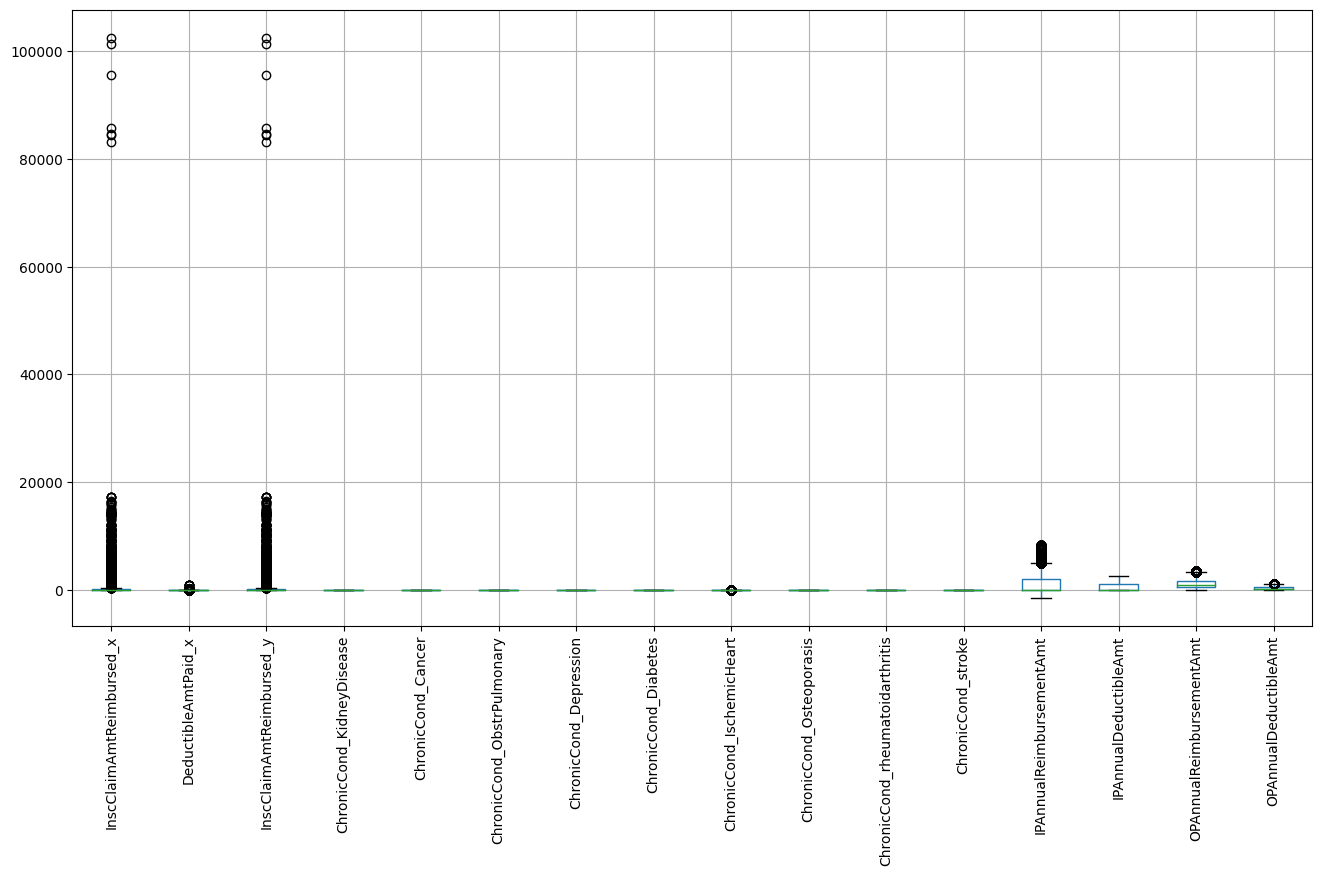

In [72]:
plt.figure(figsize = (16,8))
Final_TBIO_2.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [73]:
Final_TBIO_2.isnull().sum()

BeneID                             0
ClaimID                            0
ClaimStartDt_x                     0
ClaimEndDt_x                       0
Provider_x                         0
InscClaimAmtReimbursed_x           0
AttendingPhysician_x               0
OtherPhysician_x                   0
ClmDiagnosisCode_1_x               0
ClmDiagnosisCode_2_x               0
ClmDiagnosisCode_3_x               0
ClmDiagnosisCode_4_x               0
DeductibleAmtPaid_x                0
ClmAdmitDiagnosisCode_x            0
PotentialFraud                     0
BeneID_y                           0
ClaimStartDt_y                     0
ClaimEndDt_y                       0
Provider_y                         0
InscClaimAmtReimbursed_y           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
C

In [74]:
Final_TBIO_2.shape

(517737, 33)

In [75]:
Final_TBIO_2.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt_x                      object
ClaimEndDt_x                        object
Provider_x                          object
InscClaimAmtReimbursed_x             int64
AttendingPhysician_x                object
OtherPhysician_x                    object
ClmDiagnosisCode_1_x                object
ClmDiagnosisCode_2_x                object
ClmDiagnosisCode_3_x                object
ClmDiagnosisCode_4_x                object
DeductibleAmtPaid_x                  int64
ClmAdmitDiagnosisCode_x             object
PotentialFraud                      object
BeneID_y                            object
ClaimStartDt_y                      object
ClaimEndDt_y                        object
Provider_y                          object
InscClaimAmtReimbursed_y             int64
ChronicCond_KidneyDisease          float64
ChronicCond_Cancer                 float64
ChronicCond_ObstrPulmonary         float64
ChronicCond

# Making a copy of the Original Merged Dataset

In [76]:
df_final=Final_TBIO_2.copy()

In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_final['PotentialFraud'] = le.fit_transform(df_final['PotentialFraud'])


In [78]:
df_final.head()

,BeneID,ClaimID,ClaimStartDt_x,ClaimEndDt_x,Provider_x,InscClaimAmtReimbursed_x,AttendingPhysician_x,OtherPhysician_x,ClmDiagnosisCode_1_x,ClmDiagnosisCode_2_x,ClmDiagnosisCode_3_x,ClmDiagnosisCode_4_x,DeductibleAmtPaid_x,ClmAdmitDiagnosisCode_x,PotentialFraud,BeneID_y,ClaimStartDt_y,ClaimEndDt_y,Provider_y,InscClaimAmtReimbursed_y,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,PHY429430,78943,V5866,V1272,4019,0,56409,1,BENE11002,2009-10-11,2009-10-11,PRV56011,30,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,30.0,50.0
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,PHY429430,71988,4019,4019,4019,0,V7612,1,BENE11004,2009-01-06,2009-01-06,PRV56011,40,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1810.0,760.0
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,PHY429430,82382,30000,72887,4280,0,71947,1,BENE11004,2009-01-22,2009-01-22,PRV56011,200,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1810.0,760.0
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,PHY429430,20381,4019,4019,4019,0,V7612,1,BENE11004,2009-02-03,2009-02-03,PRV56011,20,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1810.0,760.0
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,PHY429430,V6546,4280,2449,V854,0,V7612,1,BENE11004,2009-03-03,2009-03-03,PRV56011,40,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1810.0,760.0


# Separating the Target and Independent Variables

In [79]:
# Numerical values in df_final_num

df_final_num=df_final.select_dtypes(include=[np.number])
df_final_num.columns

Index(['InscClaimAmtReimbursed_x', 'DeductibleAmtPaid_x', 'PotentialFraud',
       'InscClaimAmtReimbursed_y', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'],
      dtype='object')

In [80]:
# Categorical values in df_final_cat

df_final_cat = df_final.select_dtypes(include=[object])
df_final_cat.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt_x', 'ClaimEndDt_x', 'Provider_x',
       'AttendingPhysician_x', 'OtherPhysician_x', 'ClmDiagnosisCode_1_x',
       'ClmDiagnosisCode_2_x', 'ClmDiagnosisCode_3_x', 'ClmDiagnosisCode_4_x',
       'ClmAdmitDiagnosisCode_x', 'BeneID_y', 'ClaimStartDt_y', 'ClaimEndDt_y',
       'Provider_y'],
      dtype='object')

In [81]:
print(df_final_num.columns)

Index(['InscClaimAmtReimbursed_x', 'DeductibleAmtPaid_x', 'PotentialFraud',
       'InscClaimAmtReimbursed_y', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt'],
      dtype='object')


In [82]:
# Separating the target and independent variables
y = df_final_num['PotentialFraud']
x1 = df_final_num.drop('PotentialFraud', axis=1)

In [83]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

# standardize all the columns of the dataframe
num_scaled = rs.fit_transform(x1)


In [84]:
from sklearn.preprocessing import MinMaxScaler 
# initialize the minmax scaler
ms = MinMaxScaler()

# standardize all the columns of the dataframe
num_scaled = ms.fit_transform(x1)

In [85]:
X = pd.DataFrame(num_scaled,columns = x1.columns)
X.head()

,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,InscClaimAmtReimbursed_y,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,0.000293,0.0,0.000293,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.144265,0.0,0.008596,0.045872
1,0.000390,0.0,0.000390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
2,0.001951,0.0,0.001951,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
3,0.000195,0.0,0.000195,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
4,0.000390,0.0,0.000390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248


In [86]:
X.head()

,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,InscClaimAmtReimbursed_y,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,0.000293,0.0,0.000293,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.144265,0.0,0.008596,0.045872
1,0.000390,0.0,0.000390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
2,0.001951,0.0,0.001951,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
3,0.000195,0.0,0.000195,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
4,0.000390,0.0,0.000390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248


In [87]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PotentialFraud, dtype: int32

In [88]:
df_final.dtypes

BeneID                              object
ClaimID                             object
ClaimStartDt_x                      object
ClaimEndDt_x                        object
Provider_x                          object
InscClaimAmtReimbursed_x             int64
AttendingPhysician_x                object
OtherPhysician_x                    object
ClmDiagnosisCode_1_x                object
ClmDiagnosisCode_2_x                object
ClmDiagnosisCode_3_x                object
ClmDiagnosisCode_4_x                object
DeductibleAmtPaid_x                  int64
ClmAdmitDiagnosisCode_x             object
PotentialFraud                       int32
BeneID_y                            object
ClaimStartDt_y                      object
ClaimEndDt_y                        object
Provider_y                          object
InscClaimAmtReimbursed_y             int64
ChronicCond_KidneyDisease          float64
ChronicCond_Cancer                 float64
ChronicCond_ObstrPulmonary         float64
ChronicCond

# Train Test Split

#### Scaling and adding the constant column for Logistic Reg

In [89]:
x_constant = X.copy()
y = df_final_num.PotentialFraud

In [90]:
x_constant = sm.add_constant(x_constant,has_constant ='skip')
x_constant.head()

,const,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,InscClaimAmtReimbursed_y,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,1.0,0.000293,0.0,0.000293,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.144265,0.0,0.008596,0.045872
1,1.0,0.000390,0.0,0.000390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
2,1.0,0.001951,0.0,0.001951,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
3,1.0,0.000195,0.0,0.000195,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
4,1.0,0.000390,0.0,0.000390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248


In [91]:
# this split is for the Logistic Regression with the constant column

X_train_const,X_test_const,y_train_const,y_test_const = train_test_split(x_constant,y,test_size = 0.2,random_state = 10)

# print dimension of train set
print('X_train_const', X_train_const.shape)
print('y_train_const', y_train_const.shape)

# print dimension of test set
print('X_test_const', X_test_const.shape)
print('y_test_const', y_test_const.shape)

X_train_const (414189, 17)
y_train_const (414189,)
X_test_const (103548, 17)
y_test_const (103548,)


In [92]:
X_train_const.head(2)

,const,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,InscClaimAmtReimbursed_y,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
377346,1.0,0.032195,0.0,0.032195,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.144265,0.0,0.211847,0.183486
300857,1.0,0.000293,0.0,0.000293,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.144265,0.0,0.395415,0.568807


In [93]:
y_train_const.head(2)

377346    0
300857    0
Name: PotentialFraud, dtype: int32

In [94]:
X_test_const.head(2)

,const,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,InscClaimAmtReimbursed_y,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
316309,1.0,0.000683,0.0,0.000683,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.144265,0.000000,0.272206,0.311927
468783,1.0,0.000878,0.0,0.000878,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.490331,0.405159,0.051576,0.642202


In [95]:
y_test_const.head(2)

316309    1
468783    0
Name: PotentialFraud, dtype: int32

In [96]:
X_test_const.isnull().sum()

const                              0
InscClaimAmtReimbursed_x           0
DeductibleAmtPaid_x                0
InscClaimAmtReimbursed_y           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
IPAnnualReimbursementAmt           0
IPAnnualDeductibleAmt              0
OPAnnualReimbursementAmt           0
OPAnnualDeductibleAmt              0
dtype: int64

# Models

In [97]:
score_card = pd.DataFrame(columns=['Model_Name','Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(algorithm_name,model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test_const)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                                    'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test_const, y_pred),
                                    'Precision Score': metrics.precision_score(y_test_const, y_pred),
                                    'Recall Score': metrics.recall_score(y_test_const, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test_const, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test_const, y_pred),
                                    'f1-score': metrics.f1_score(y_test_const, y_pred)}, 
                                    ignore_index = True)

### Logistic Regression Model

In [98]:
logreg = LogisticRegression()
logreg.fit(X_train_const,y_train_const)

LogisticRegression()

In [99]:
# let 'y_pred' be the predicted values of y
y_pred_prob = logreg.predict(X_test_const)

In [100]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [101]:
acc_table = classification_report(y_test_const, y_pred)
print(acc_table)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     65775
           1       0.00      0.00      0.00     37773

    accuracy                           0.64    103548
   macro avg       0.32      0.50      0.39    103548
weighted avg       0.40      0.64      0.49    103548



In [102]:
grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv=5, scoring='roc_auc', n_jobs=-1, return_train_score=True)
logreg_cv.fit(X_train_const, y_train_const)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc')

In [103]:
print("best parameters = ",logreg_cv.best_params_)
print("roc_auc_score :",logreg_cv.best_score_)

best parameters =  {'C': 0.01, 'penalty': 'l2'}
roc_auc_score : 0.5031889564241083


In [104]:
log_reg = LogisticRegression(C = 1.0, penalty='l2')
log_reg.fit(X_train_const, y_train_const)

LogisticRegression()

In [105]:
def pred_prob(clf, data): 
    # predicts the probabability of class label using the model
    y_pred = clf.predict_proba(data)[:,1]
    return y_pred

def draw_roc(train_fpr, train_tpr, test_fpr, test_tpr):
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+"{:.4f}".format(train_auc))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+"{:.4f}".format(test_auc))
    plt.legend()
    plt.xlabel("False Positive Rate(FPR)", size = 14)
    plt.ylabel("True Positive Rate(TPR)", size = 14)
    plt.title("Area Under Curve", size = 16)
    plt.grid(True, which='major', color='g', linestyle='-')
    plt.show()
    
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
#     print("max(tpr*(1-fpr)) = ", max(tpr*(1-fpr)), "for threshold = ", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [106]:
def draw_confusion_matrix(best_t, X_train_const, x_test_const, y_train_const, y_test_const, y_train_pred, y_test_pred):
    # Confusion matrix for train and test dataset
    fig, ax = plt.subplots(1,2, figsize=(20,6))

    train_prediction = predict_with_best_t(y_train_pred, best_t)
    cm = confusion_matrix(y_train_const, train_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[0])
    ax[0].set_title('Train Dataset Confusion Matrix', size = 16)
    ax[0].set_xlabel("Predicted Label", size = 14)
    ax[0].set_ylabel("Actual Label", size = 14)

    test_prediction = predict_with_best_t(y_test_pred, best_t)
    cm = confusion_matrix(y_test_const, test_prediction)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax[1])
    ax[1].set_title('Test Dataset Confusion Matrix', size = 16)
    ax[1].set_xlabel("Predicted Label", size = 14)
    ax[1].set_ylabel("Actual Label", size = 14)
    plt.grid()
    plt.show()
    
    return train_prediction, test_prediction

In [107]:
def validate_model(clf, x_train_const, x_test_const, y_train_const, y_test_const):
    # predict the probability of train data
    y_train_pred = pred_prob(clf, x_train_const)
    # predict the probability of test data
    y_test_pred = pred_prob(clf, x_test_const)
    # calculate tpr, fpr for diffeent thresholds using roc_curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_const, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test_const, y_test_pred)
    
    # calculate auc for train and test
    train_auc = auc(train_fpr, train_tpr)
    print("Train AUC = ", train_auc)
    test_auc = auc(test_fpr, test_tpr)
    print("Test AUC = ", test_auc)
    
    draw_roc(train_fpr, train_tpr, test_fpr, test_tpr)
    
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    train_prediction, test_prediction = draw_confusion_matrix(best_t, x_train_const, x_test_const, y_train_const, y_test_const, y_train_pred, y_test_pred)
#     print(len(test_prediction))
    
    train_f1_score = f1_score(y_train_const, train_prediction)
    test_f1_score = f1_score(y_test_const, test_prediction)
    
    return test_auc, test_f1_score, best_t

Train AUC =  0.504853576735155
Test AUC =  0.5056318114603326


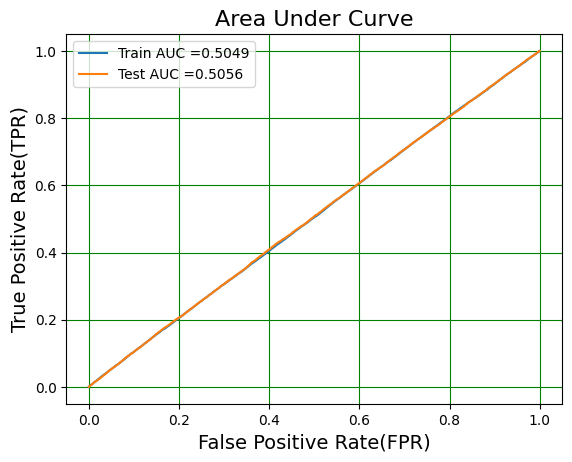

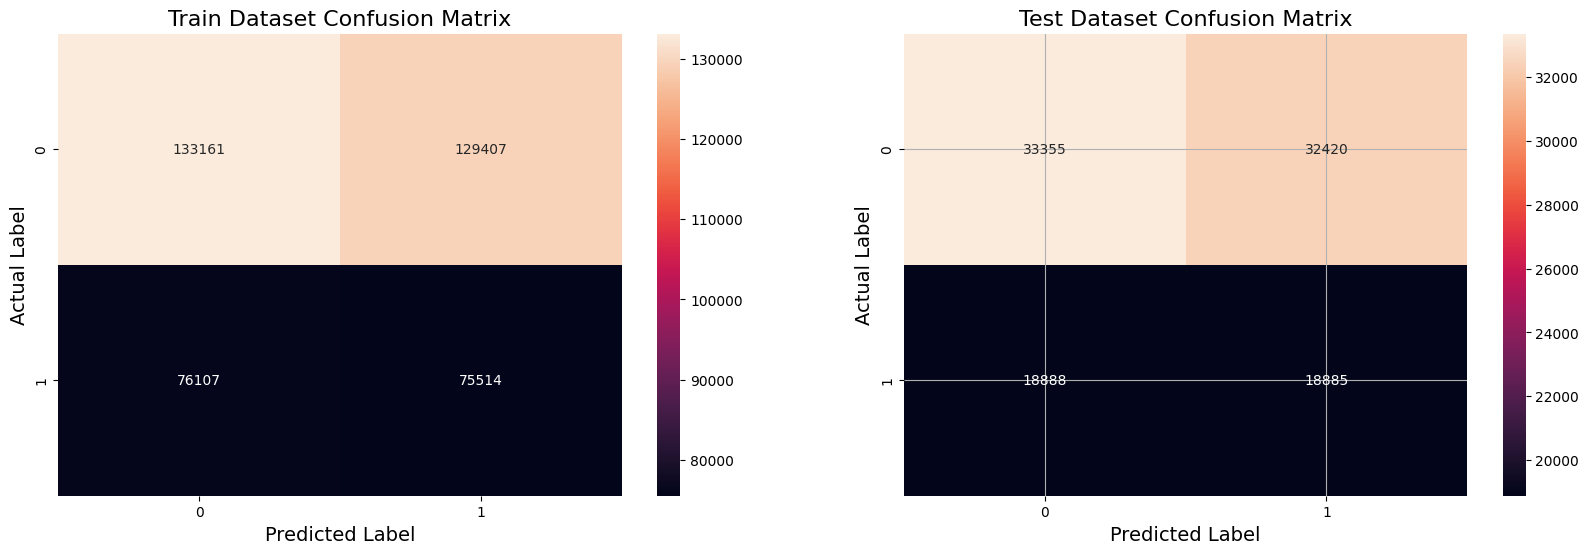

Best Threshold = 0.3660
Model AUC is : 0.5056
Model F1 Score is : 0.4240


In [108]:
# Validate LogisticRegression model
test_auc, test_f1_score, best_t = validate_model(log_reg, X_train_const, X_test_const, y_train_const, y_test_const)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [109]:
#Predict the response for test dataset
y_pred = log_reg.predict(X_test_const)

In [110]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_Log_cv = [ 0 if x < 0.37 else 1 for x in y_pred]

In [111]:
acc_table = classification_report(y_test_const, y_pred_Log_cv)
print(acc_table)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     65775
           1       0.00      0.00      0.00     37773

    accuracy                           0.64    103548
   macro avg       0.32      0.50      0.39    103548
weighted avg       0.40      0.64      0.49    103548



In [112]:
print("roc_auc_score:",metrics.roc_auc_score(y_test_const, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test_const, y_pred))

roc_auc_score: 0.5
cohen_kappa_score: 0.0


### Decision tree

In [113]:
y = df_final_num.PotentialFraud

In [114]:
X.head()

,InscClaimAmtReimbursed_x,DeductibleAmtPaid_x,InscClaimAmtReimbursed_y,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,0.000293,0.0,0.000293,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.144265,0.0,0.008596,0.045872
1,0.000390,0.0,0.000390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
2,0.001951,0.0,0.001951,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
3,0.000195,0.0,0.000195,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248
4,0.000390,0.0,0.000390,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.144265,0.0,0.518625,0.697248


In [115]:
y = df_final_num.PotentialFraud

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 10)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (414189, 16)
y_train (414189,)
X_test (103548, 16)
y_test (103548,)


In [116]:
score_card = pd.DataFrame(columns=['Model_Name', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

def update_score_card(algorithm_name,model):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                                  
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

In [117]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [118]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

### Over-fitting in Decision Tree

In [119]:
# Build a full decision tree model on a train dataset using 'gini'.
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [120]:
y_pred = decision_tree.predict(X_test)
y_pred_dtrcv = [ 0 if x < 0.5 else 1 for x in y_pred]

In [121]:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_dtrcv))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_dtrcv))

roc_auc_score: 0.6025166425820256
cohen_kappa_score: 0.2096274093489946


In [122]:
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 70,
                                  min_samples_split = 60,
                                  max_leaf_nodes = 85,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree1 = dt_model.fit(X_train, y_train)

# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree1)


# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree1)


# print the performance measures
print('Test data:\n', test_report)

Test data:
               precision    recall  f1-score   support

           0       0.64      0.99      0.78     65775
           1       0.54      0.01      0.02     37773

    accuracy                           0.64    103548
   macro avg       0.59      0.50      0.40    103548
weighted avg       0.60      0.64      0.50    103548



Train AUC =  0.5193329384639588
Test AUC =  0.5150982050721424


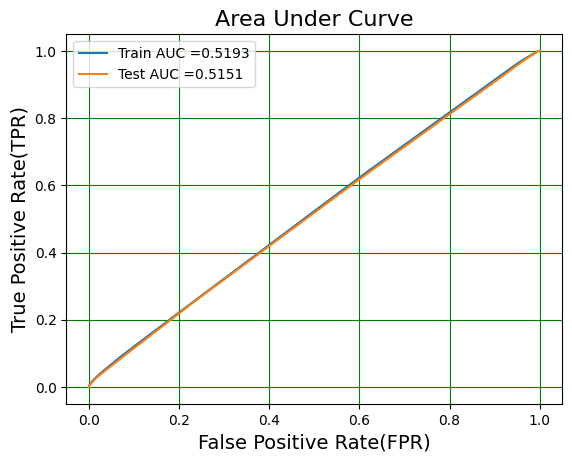

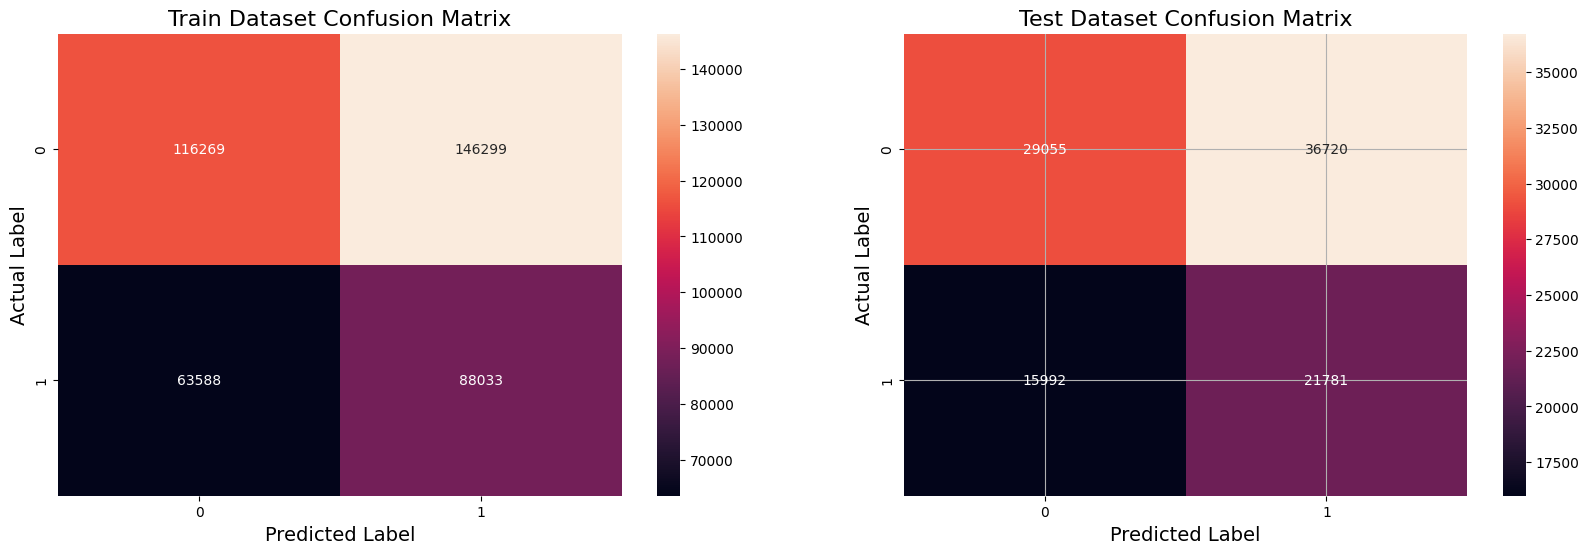

Best Threshold = 0.3673
Model AUC is : 0.5151
Model F1 Score is : 0.4525


In [123]:
test_auc, test_f1_score, best_t = validate_model(decision_tree1, X_train, X_test, y_train, y_test)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [124]:
y_pred = decision_tree1.predict(X_test)
y_pred_dt1 = [ 0 if x < 0.5 else 1 for x in y_pred]

In [125]:
print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_dt1))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_dt1))

roc_auc_score: 0.5027231918112764
cohen_kappa_score: 0.006882171810815185


### Random Forest

In [126]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

In [127]:
# Calculate performance measures on the test, train set.
test_report = get_test_report(rf_model) 
train_report = get_train_report(rf_model)

In [128]:
rf_model = RandomForestClassifier(criterion = 'gini',
                                  max_depth = 50,
                                  min_samples_split = 30,
                                  max_leaf_nodes = 65,
                                  random_state = 10)
random_forest = rf_model.fit(X_train, y_train)

train_report = get_train_report(random_forest)
print('Train data:\n', train_report)

test_report = get_test_report(random_forest)
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.63      1.00      0.78    262568
           1       1.00      0.00      0.00    151621

    accuracy                           0.63    414189
   macro avg       0.82      0.50      0.39    414189
weighted avg       0.77      0.63      0.49    414189

Test data:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78     65775
           1       1.00      0.00      0.00     37773

    accuracy                           0.64    103548
   macro avg       0.82      0.50      0.39    103548
weighted avg       0.77      0.64      0.49    103548



In [129]:
y_pred = random_forest.predict(X_test)
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred_prob))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred_prob))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78     65775
           1       1.00      0.00      0.00     37773

    accuracy                           0.64    103548
   macro avg       0.82      0.50      0.39    103548
weighted avg       0.77      0.64      0.49    103548

roc_auc_score: 0.5000132369682048
cohen_kappa_score: 3.363291808444746e-05


Train AUC =  0.568633511197905
Test AUC =  0.5405841579219914


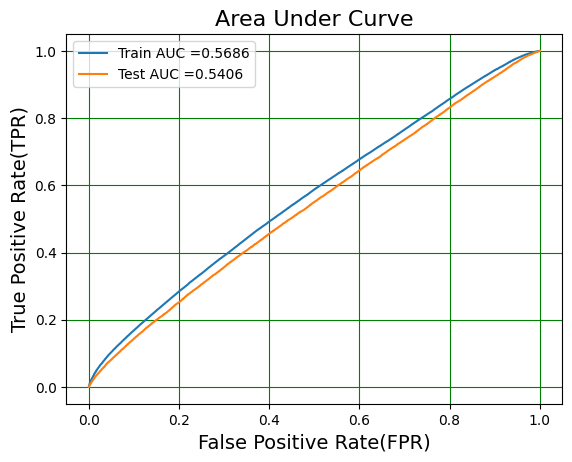

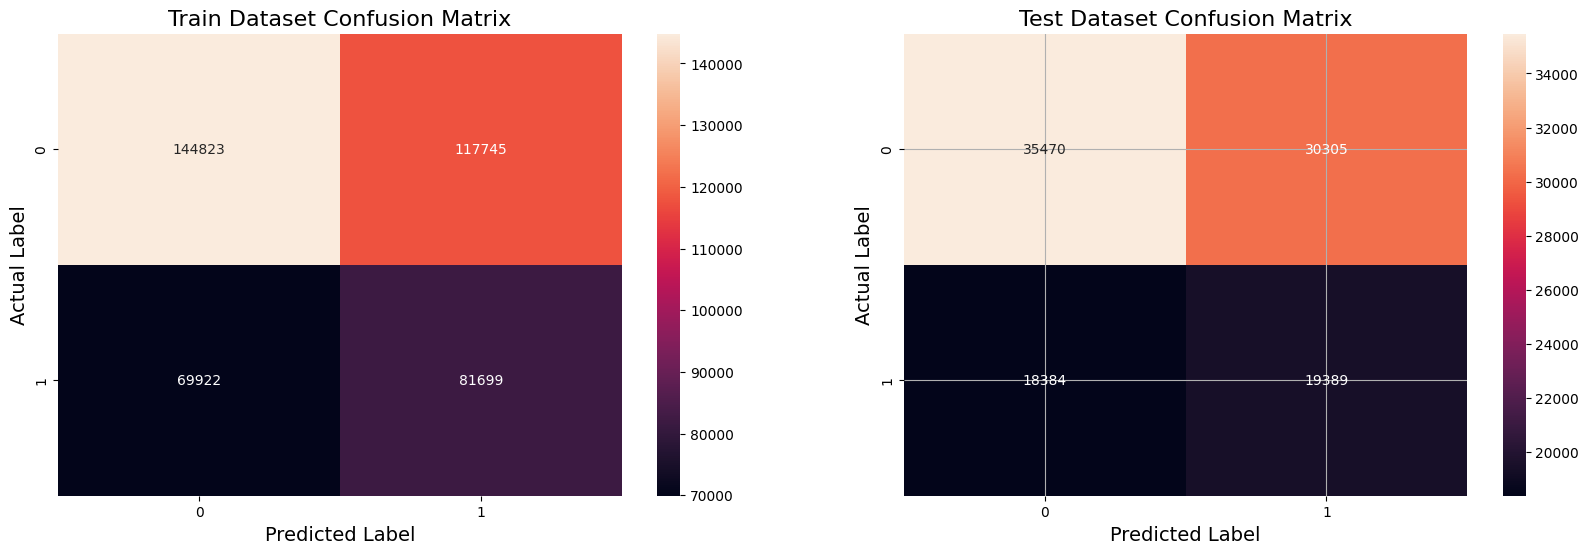

Best Threshold = 0.3662
Model AUC is : 0.5406
Model F1 Score is : 0.4433


In [130]:
test_auc, test_f1_score, best_t = validate_model(random_forest, X_train, X_test, y_train, y_test)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

### GaussianNB Classifier

In [132]:
#Create a Gaussian Classifier
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

GaussianNB()

Train AUC =  0.5024448745549672
Test AUC =  0.5023292346829737


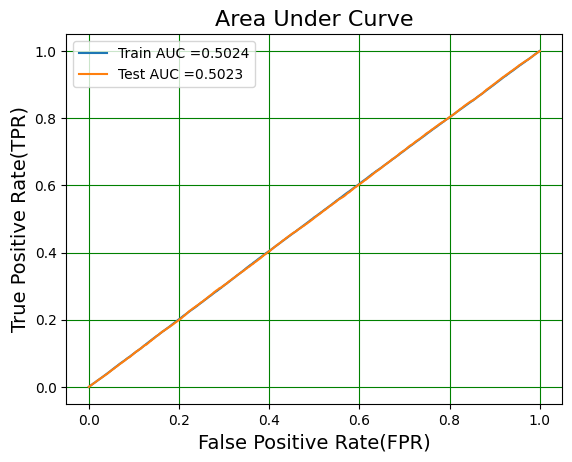

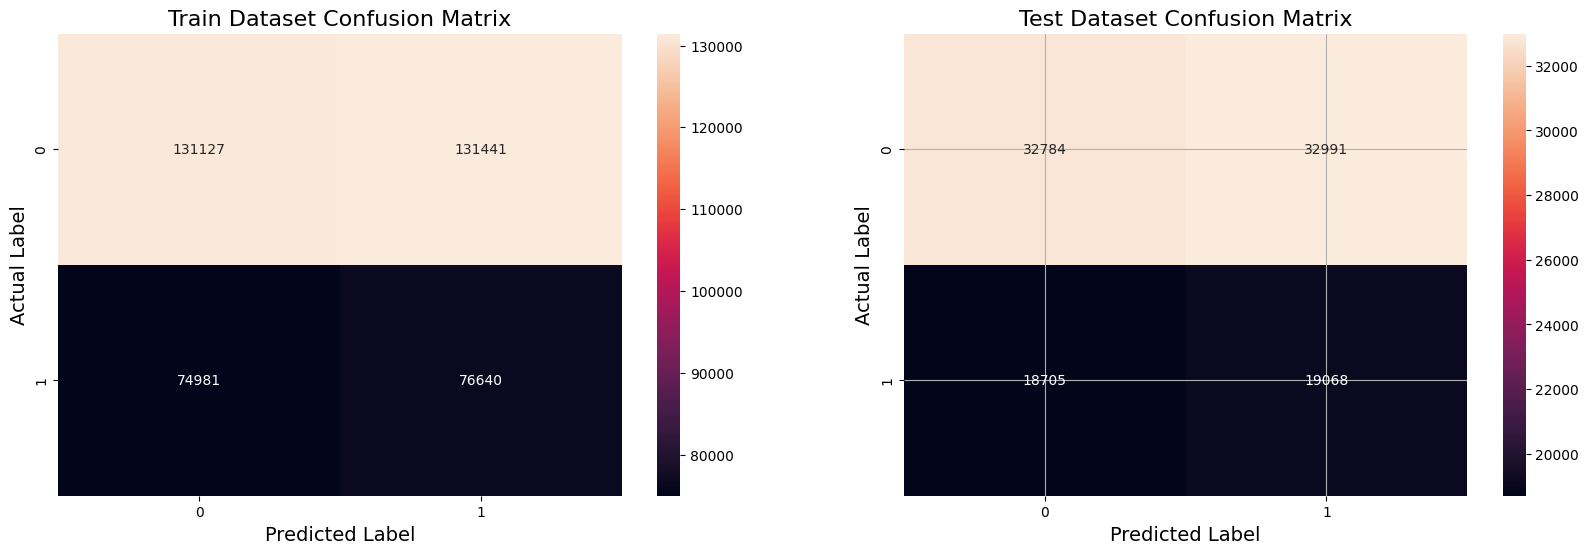

Best Threshold = 0.2918
Model AUC is : 0.5023
Model F1 Score is : 0.4245


In [133]:
# Validate NB model
test_auc, test_f1_score, best_t = validate_model(gaussian_nb, X_train, X_test, y_train, y_test)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [134]:
#Predict the response for test dataset
y_pred = gaussian_nb.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.94      0.76     65775
           1       0.36      0.05      0.09     37773

    accuracy                           0.62    103548
   macro avg       0.50      0.50      0.43    103548
weighted avg       0.53      0.62      0.52    103548

roc_auc_score: 0.4994189124911428
cohen_kappa_score: -0.001418900075334406


### KNN model on a training dataset using euclidean distance (Standardized Data)

In [135]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

In [136]:
#Predict the response for test dataset
y_pred = knn_model.predict(X_test)


# convert probabilities to 0 and 1 using 'if_else'
y_pred_prob = [ 0 if x < 0.5 else 1 for x in y_pred]


acc_table = classification_report(y_test, y_pred_prob)

# print the table
print(acc_table)

print("roc_auc_score:",metrics.roc_auc_score(y_test, y_pred))
print("cohen_kappa_score:",metrics.cohen_kappa_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     65775
           1       0.56      0.51      0.53     37773

    accuracy                           0.67    103548
   macro avg       0.64      0.64      0.64    103548
weighted avg       0.67      0.67      0.67    103548

roc_auc_score: 0.6377984727285702
cohen_kappa_score: 0.28088532039711145


Train AUC =  0.8769330882716442
Test AUC =  0.6843369355093399


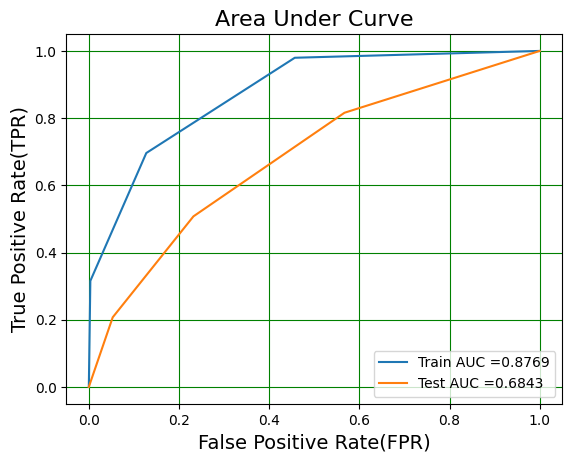

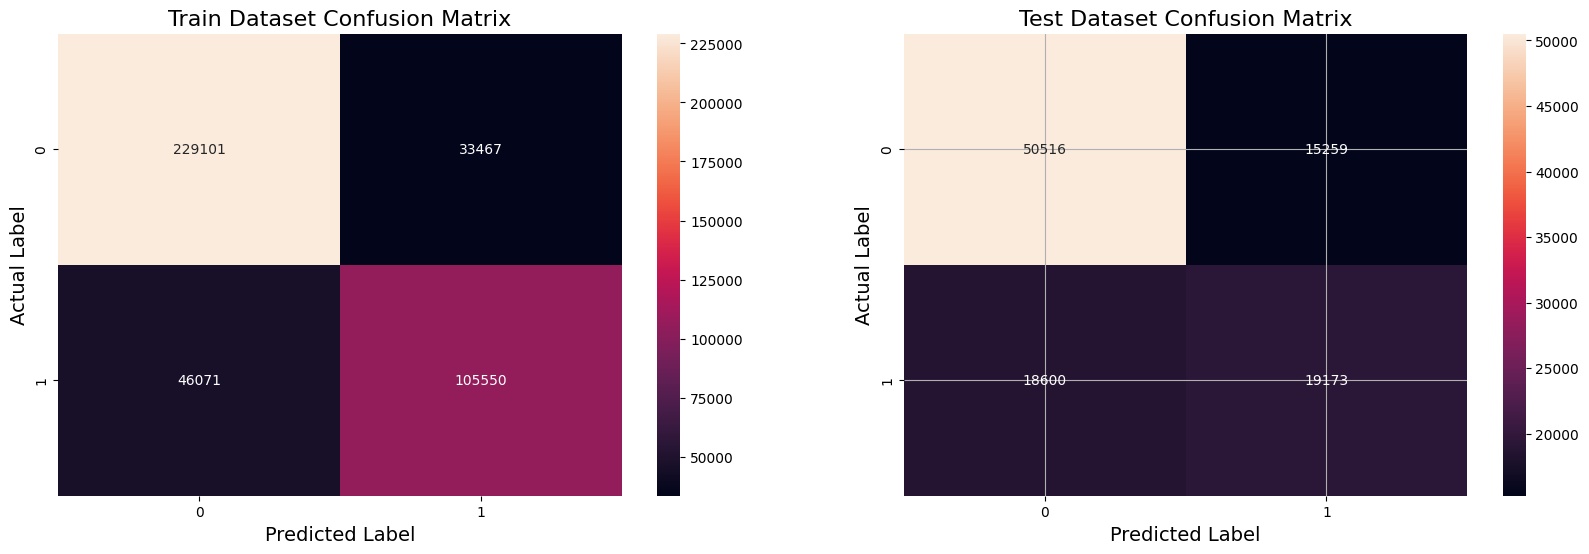

Best Threshold = 0.6667
Model AUC is : 0.6843
Model F1 Score is : 0.5311


In [139]:
test_auc, test_f1_score, best_t = validate_model(knn_model, X_train, X_test, y_train, y_test)

print("Best Threshold = {:.4f}".format(best_t))
print("Model AUC is : {:.4f}".format(test_auc))
print("Model F1 Score is : {:.4f}".format(test_f1_score))

In [137]:
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     65775
           1       0.56      0.51      0.53     37773

    accuracy                           0.67    103548
   macro avg       0.64      0.64      0.64    103548
weighted avg       0.67      0.67      0.67    103548



# Results and Conclusions

In [138]:
from beautifultable import BeautifulTable
table = BeautifulTable()
table.column_headers= ["Model Name",'Accuracy','Precision ','Recall', "F1 Score"," AUC ",'Kappa']
table.append_row(["Logistic Regression", "0.64", "0.64","1.00", "0.78",'0.50','0'])
table.append_row(["Base Decision Tree ", "0.64", "0.64","0.99", "0.78",'0.52','0.2'])
table.append_row(["Random Forest ", "0.64", "0.64","1.00", "0.78",'0.5','3.36'])
table.append_row(["GaussianNB", "0.62", "0.63","0.94", "0.76",'0.49','0.001'])
table.append_row(["Knn", "0.67", "0.73","0.77", "0.75",'0.63','0.28'])

print(table)

+-------------------+----------+-----------+--------+----------+-------+-------+
|    Model Name     | Accuracy | Precision | Recall | F1 Score |  AUC  | Kappa |
|                   |          |           |        |          |       |       |
+-------------------+----------+-----------+--------+----------+-------+-------+
| Logistic Regressi |   0.64   |   0.64    |  1.0   |   0.78   |  0.5  |   0   |
|        on         |          |           |        |          |       |       |
+-------------------+----------+-----------+--------+----------+-------+-------+
| Base Decision Tre |   0.64   |   0.64    |  0.99  |   0.78   | 0.52  |  0.2  |
|        e          |          |           |        |          |       |       |
+-------------------+----------+-----------+--------+----------+-------+-------+
|  Random Forest    |   0.64   |   0.64    |  1.0   |   0.78   |  0.5  | 3.36  |
+-------------------+----------+-----------+--------+----------+-------+-------+
|    GaussianNB     |   0.62